### We're going to use a new dataset here, to demonstrate how to deal with larger datasets. This is a subset of the of 311 service requests from [NYC Open Data](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). 

Import pandas, numpy

In [1]:
import pandas as pd
import numpy as np

# 1. Open the data using read_csv and give it a name complains

Depending on your pandas version, you might see an error like "DtypeWarning: Columns (8) have mixed types". This means that it's encountered a problem reading in our data. In this case it almost certainly means that it has columns where some of the entries are strings and some are integers.
#### pd.read_csv('______________.csv',`dtype='unicode'`)

In [17]:
complaints=pd.read_csv('311-service-requests.csv',dtype='unicode')

In [18]:
complaints

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.80769092704951,-73.94738703491433,"(40.80769092704951, -73.94738703491433)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111064,26426013,10/04/2013 12:01:13 AM,10/07/2013 04:07:16 PM,DPR,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,11213,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111065,26428083,10/04/2013 12:01:05 AM,10/04/2013 02:13:50 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11434,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.656160351546845,-73.76735262738222,"(40.656160351546845, -73.76735262738222)"
111066,26428987,10/04/2013 12:00:45 AM,10/04/2013 01:25:01 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10016,344 EAST 28 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740295354643706,-73.97695165980414,"(40.740295354643706, -73.97695165980414)"
111067,26426115,10/04/2013 12:00:28 AM,10/04/2013 04:17:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,11226,1233 FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.64018174662485,-73.95530566958138,"(40.64018174662485, -73.95530566958138)"


# 2. What's even in it? (the summary)


In [19]:
complaints.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.80769092704951,-73.94738703491433,"(40.80769092704951, -73.94738703491433)"


In [20]:
complaints.tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
111064,26426013,10/04/2013 12:01:13 AM,10/07/2013 04:07:16 PM,DPR,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,11213,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111065,26428083,10/04/2013 12:01:05 AM,10/04/2013 02:13:50 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11434,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.656160351546845,-73.76735262738222,"(40.656160351546845, -73.76735262738222)"
111066,26428987,10/04/2013 12:00:45 AM,10/04/2013 01:25:01 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10016,344 EAST 28 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740295354643706,-73.97695165980414,"(40.740295354643706, -73.97695165980414)"
111067,26426115,10/04/2013 12:00:28 AM,10/04/2013 04:17:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,11226,1233 FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.64018174662485,-73.95530566958138,"(40.64018174662485, -73.95530566958138)"
111068,26428033,10/04/2013 12:00:10 AM,10/04/2013 01:20:52 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11236,1259 EAST 94 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640024057399216,-73.90071711703163,"(40.640024057399216, -73.90071711703163)"


In [21]:
complaints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111069 entries, 0 to 111068
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Unique Key                      111069 non-null  object
 1   Created Date                    111069 non-null  object
 2   Closed Date                     60270 non-null   object
 3   Agency                          111069 non-null  object
 4   Agency Name                     111069 non-null  object
 5   Complaint Type                  111069 non-null  object
 6   Descriptor                      110613 non-null  object
 7   Location Type                   79022 non-null   object
 8   Incident Zip                    98807 non-null   object
 9   Incident Address                84441 non-null   object
 10  Street Name                     84432 non-null   object
 11  Cross Street 1                  84728 non-null   object
 12  Cross Street 2                

In [22]:
complaints.sample(10)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
32328,26550274,10/24/2013 12:00:00 AM,NaN,HPD,Department of Housing Preservation and Develop...,ELECTRIC,BELL-BUZZER/INTERCOM,RESIDENTIAL BUILDING,10459,1390 PROSPECT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.831535787281794,-73.89677801499273,"(40.831535787281794, -73.89677801499273)"
71765,26486338,10/15/2013 10:18:00 AM,NaN,DEP,Department of Environmental Protection,Noise,Noise: air condition/ventilation equipment (NV1),NaN,10003,214 3 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.73608625463075,-73.9851586293714,"(40.73608625463075, -73.9851586293714)"
104230,26445751,10/06/2013 12:45:57 PM,10/06/2013 02:47:24 PM,NYPD,New York City Police Department,Illegal Parking,Double Parked Blocking Traffic,Street/Sidewalk,10026,218 WEST 116 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.803576424475736,-73.95339353816284,"(40.803576424475736, -73.95339353816284)"
96563,26456313,10/08/2013 07:49:00 AM,NaN,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,11219,49 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.635688782354,-73.99321919840297,"(40.635688782354, -73.99321919840297)"
105063,26445941,10/06/2013 12:00:00 AM,NaN,HPD,Department of Housing Preservation and Develop...,PLUMBING,WATER-LEAKS,RESIDENTIAL BUILDING,10029,311 EAST 109 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.792336317680174,-73.9405012909439,"(40.792336317680174, -73.9405012909439)"
22034,26568103,10/26/2013 12:00:00 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Vacant Lot,11238,1008 FULTON STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.68211011879404,-73.96039014590608,"(40.68211011879404, -73.96039014590608)"
19460,26564717,10/26/2013 06:40:11 PM,10/30/2013 04:55:20 PM,DOT,Department of Transportation,Broken Muni Meter,Coin or Card Did Not Register,Street,10023,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.78028160288897,-73.9815199245466,"(40.78028160288897, -73.9815199245466)"
95492,26458207,10/08/2013 12:03:02 PM,10/09/2013 06:56:43 AM,DOF,Department of Finance,DOF Literature Request,Property Tax Exemption Application for Owners ...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92651,26464126,10/09/2013 12:00:00 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Mouse Sighting,3+ Family Apt. Building,11235,3051 BRIGHTON 3 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.577812221272346,-73.96446943719043,"(40.577812221272346, -73.96446943719043)"
52152,26519976,10/20/2013 12:26:33 PM,10/20/2013 01:32:06 PM,NYPD,New York City Police Department,Posting Advertisement,Building,Residential Building/House,10003,50 EAST 1 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.72380671426359,-73.98969629362298,"(40.72380671426359, -73.98969629362298)"


## spaces in column names are replaced with ‘_’

In [23]:
complaints.columns =[column.replace(" ", "_")  for column in complaints.columns]

In [24]:
complaints.columns

Index(['Unique_Key', 'Created_Date', 'Closed_Date', 'Agency', 'Agency_Name',
       'Complaint_Type', 'Descriptor', 'Location_Type', 'Incident_Zip',
       'Incident_Address', 'Street_Name', 'Cross_Street_1', 'Cross_Street_2',
       'Intersection_Street_1', 'Intersection_Street_2', 'Address_Type',
       'City', 'Landmark', 'Facility_Type', 'Status', 'Due_Date',
       'Resolution_Action_Updated_Date', 'Community_Board', 'Borough',
       'X_Coordinate_(State_Plane)', 'Y_Coordinate_(State_Plane)',
       'Park_Facility_Name', 'Park_Borough', 'School_Name', 'School_Number',
       'School_Region', 'School_Code', 'School_Phone_Number', 'School_Address',
       'School_City', 'School_State', 'School_Zip', 'School_Not_Found',
       'School_or_Citywide_Complaint', 'Vehicle_Type', 'Taxi_Company_Borough',
       'Taxi_Pick_Up_Location', 'Bridge_Highway_Name',
       'Bridge_Highway_Direction', 'Road_Ramp', 'Bridge_Highway_Segment',
       'Garage_Lot_Name', 'Ferry_Direction', 'Ferry_Termina

# 3. Convert the data time columns in the data set from object to datetime format

In [25]:
complaints['Created_Date']=pd.to_datetime(complaints['Created_Date'])
complaints['Closed_Date']=pd.to_datetime(complaints['Closed_Date'])
complaints['Due_Date']=pd.to_datetime(complaints['Due_Date'])
complaints['Resolution_Action_Updated_Date']=pd.to_datetime(complaints['Resolution_Action_Updated_Date'])

In [26]:
complaints.head()

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,Bridge_Highway_Name,Bridge_Highway_Direction,Road_Ramp,Bridge_Highway_Segment,Garage_Lot_Name,Ferry_Direction,Ferry_Terminal_Name,Latitude,Longitude,Location
0,26589651,2013-10-31 02:08:41,NaT,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
1,26593698,2013-10-31 02:01:04,NaT,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)"
2,26594139,2013-10-31 02:00:24,2013-10-31 02:40:32,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)"
3,26595721,2013-10-31 01:56:23,2013-10-31 02:21:48,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)"
4,26590930,2013-10-31 01:53:44,NaT,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.80769092704951,-73.94738703491433,"(40.80769092704951, -73.94738703491433)"


# 4. Drop all the columns where most of the rows are null. Think logically

In [27]:
complaints.isnull().sum()

Unique_Key                             0
Created_Date                           0
Closed_Date                        50799
Agency                                 0
Agency_Name                            0
Complaint_Type                         0
Descriptor                           456
Location_Type                      32047
Incident_Zip                       12262
Incident_Address                   26628
Street_Name                        26637
Cross_Street_1                     26341
Cross_Street_2                     27064
Intersection_Street_1              91705
Intersection_Street_2              91703
Address_Type                        8822
City                               12215
Landmark                          110974
Facility_Type                      91965
Status                                 0
Due_Date                           71830
Resolution_Action_Updated_Date     14562
Community_Board                        0
Borough                                0
X_Coordinate_(St

In [28]:
complaints.drop(['School_or_Citywide_Complaint', 'Landmark','Vehicle_Type', 'Taxi_Company_Borough',
       'Taxi_Pick_Up_Location', 'Bridge_Highway_Name',
       'Bridge_Highway_Direction', 'Road_Ramp', 'Bridge_Highway_Segment',
       'Garage_Lot_Name', 'Ferry_Direction', 'Ferry_Terminal_Name','Closed_Date','Intersection_Street_1','Intersection_Street_2'],axis=1, inplace=True)

In [29]:
complaints.head()

,Unique_Key,Created_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,Street_Name,...,School_Code,School_Phone_Number,School_Address,School_City,School_State,School_Zip,School_Not_Found,Latitude,Longitude,Location
0,26589651,2013-10-31 02:08:41,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
1,26593698,2013-10-31 02:01:04,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)"
2,26594139,2013-10-31 02:00:24,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)"
3,26595721,2013-10-31 01:56:23,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)"
4,26590930,2013-10-31 01:53:44,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.80769092704951,-73.94738703491433,"(40.80769092704951, -73.94738703491433)"


# 5. Select the column name `Complaint_Type`,  
## find out no. of unique values in the series or data, 
## print top 5 rows of the data

In [30]:
complaints['Complaint_Type'].nunique() 

165

In [31]:
complaints['Complaint_Type'].head() 

0    Noise - Street/Sidewalk
1            Illegal Parking
2         Noise - Commercial
3            Noise - Vehicle
4                     Rodent
Name: Complaint_Type, dtype: object

# 6. Selecting multiple columns
What if we just want to know the complaint type and the borough, but not the rest of the information?

In [36]:
complaints.loc[:,['Complaint_Type','Borough']]

,Complaint_Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
...,...,...
111064,Maintenance or Facility,BROOKLYN
111065,Illegal Parking,QUEENS
111066,Noise - Street/Sidewalk,MANHATTAN
111067,Noise - Commercial,BROOKLYN


# 7. Rename the `Borough` to `District`

In [37]:
complaints['District']=complaints['Borough']

In [38]:
complaints.loc[:,['Complaint_Type','District']]

,Complaint_Type,District
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
...,...,...
111064,Maintenance or Facility,BROOKLYN
111065,Illegal Parking,QUEENS
111066,Noise - Street/Sidewalk,MANHATTAN
111067,Noise - Commercial,BROOKLYN


# 8. What's the most common complaint type?
display top 10 most common compalin


In [42]:
complaints['Complaint_Type'].value_counts().head(10)

HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
Name: Complaint_Type, dtype: int64

#  Plot the top 10 most common compalin

<AxesSubplot:>

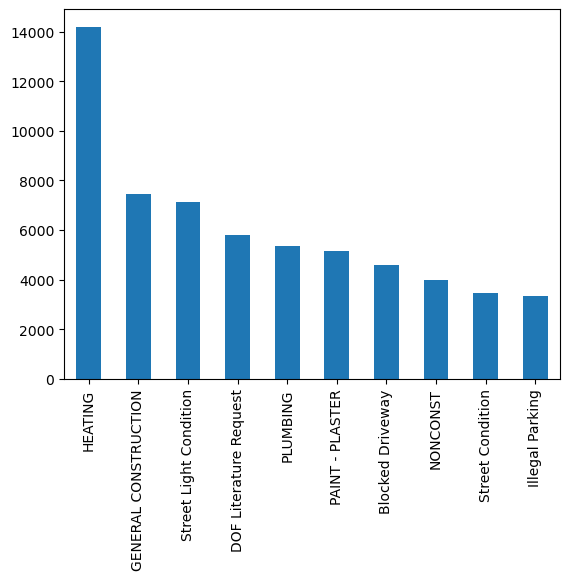

In [44]:
complaints['Complaint_Type'].value_counts().head(10).plot(kind="bar")

# 9. What's the most common `District` the complain came?
display top 10 most and plot them out

In [46]:
complaints['District'].value_counts()

BROOKLYN         32890
MANHATTAN        24288
QUEENS           22281
BRONX            19686
Unspecified       7107
STATEN ISLAND     4817
Name: District, dtype: int64

<AxesSubplot:ylabel='District'>

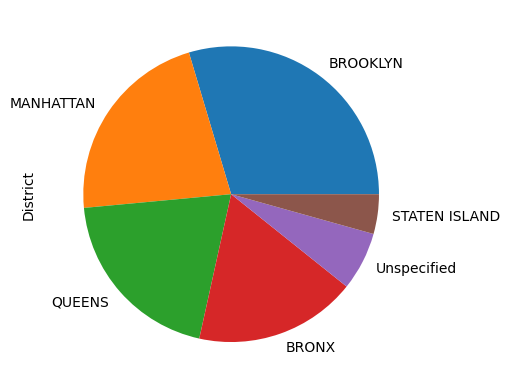

In [47]:
complaints['District'].value_counts().plot(kind='pie')

# 10. Select only top 10 Illegal Parking complains at  Queens district and save it to `new_complaint`. You can use `query`

In [50]:
new_complaint=complaints.query('Complaint_Type=="Illegal Parking" & District=="QUEENS"').head(10)

In [51]:
new_complaint

,Unique_Key,Created_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,Street_Name,...,School_Phone_Number,School_Address,School_City,School_State,School_Zip,School_Not_Found,Latitude,Longitude,Location,District
1,26593698,2013-10-31 02:01:04,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)",QUEENS
116,26591037,2013-10-30 23:20:57,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11417,133-40 85 STREET,85 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.67347065165803,-73.8511307325341,"(40.67347065165803, -73.8511307325341)",QUEENS
117,26592954,2013-10-30 23:20:26,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11365,197-05A 65 CRESCENT,65 CRESCENT,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.73996897148448,-73.7768682381755,"(40.73996897148448, -73.7768682381755)",QUEENS
140,26592551,2013-10-30 23:01:49,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11379,77-15 58 AVENUE,58 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.726633034808366,-73.8835552085296,"(40.726633034808366, -73.8835552085296)",QUEENS
186,26591575,2013-10-30 22:33:28,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11691,14-28 CHANDLER STREET,CHANDLER STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.608860268959695,-73.75593130211928,"(40.608860268959695, -73.75593130211928)",QUEENS
193,26594762,2013-10-30 22:31:22,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11356,20-42 125 STREET,125 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.78141708195395,-73.84323796414719,"(40.78141708195395, -73.84323796414719)",QUEENS
253,26592844,2013-10-30 21:46:18,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11379,NaN,NaN,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.7086929311143,-73.8753699708503,"(40.7086929311143, -73.8753699708503)",QUEENS
284,26592833,2013-10-30 21:27:13,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11433,NaN,NaN,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.70241414798045,-73.79252032151341,"(40.70241414798045, -73.79252032151341)",QUEENS
293,26594635,2013-10-30 21:22:34,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11361,NaN,NaN,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.75439605091989,-73.77719529050601,"(40.75439605091989, -73.77719529050601)",QUEENS
319,26592819,2013-10-30 21:10:54,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11413,185-11 WILLIAMSON AVENUE,WILLIAMSON AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.680211769230816,-73.75749088965092,"(40.680211769230816, -73.75749088965092)",QUEENS


# 11 Filter top 3 columns `Complaint_Type,District, Created_Date,Descriptor` from the new_complaint

In [66]:
new_complaint.loc[:,['Complaint_Type','District', 'Created_Date','Descriptor']].head(3)

,Complaint_Type,District,Created_Date,Descriptor
1,Illegal Parking,QUEENS,2013-10-31 02:01:04,Commercial Overnight Parking
116,Illegal Parking,QUEENS,2013-10-30 23:20:57,Blocked Hydrant
117,Illegal Parking,QUEENS,2013-10-30 23:20:26,Posted Parking Sign Violation


# 12 Save `new_complaint` dataframe to CSV format and load it back to verify the data

In [70]:
new_complaint.to_csv('new_complaint.csv',index=True)

In [73]:
open_compalints=pd.read_csv('new_complaint.csv')
open_compalints

,Unnamed: 0,Unique_Key,Created_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,School_Phone_Number,School_Address,School_City,School_State,School_Zip,School_Not_Found,Latitude,Longitude,Location,District
0,1,26593698,2013-10-31 02:01:04,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)",QUEENS
1,116,26591037,2013-10-30 23:20:57,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11417,133-40 85 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.673471,-73.851131,"(40.67347065165803, -73.8511307325341)",QUEENS
2,117,26592954,2013-10-30 23:20:26,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11365,197-05A 65 CRESCENT,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.739969,-73.776868,"(40.73996897148448, -73.7768682381755)",QUEENS
3,140,26592551,2013-10-30 23:01:49,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11379,77-15 58 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.726633,-73.883555,"(40.726633034808366, -73.8835552085296)",QUEENS
4,186,26591575,2013-10-30 22:33:28,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11691,14-28 CHANDLER STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.608860,-73.755931,"(40.608860268959695, -73.75593130211928)",QUEENS
5,193,26594762,2013-10-30 22:31:22,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11356,20-42 125 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.781417,-73.843238,"(40.78141708195395, -73.84323796414719)",QUEENS
6,253,26592844,2013-10-30 21:46:18,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11379,NaN,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.708693,-73.875370,"(40.7086929311143, -73.8753699708503)",QUEENS
7,284,26592833,2013-10-30 21:27:13,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11433,NaN,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.702414,-73.792520,"(40.70241414798045, -73.79252032151341)",QUEENS
8,293,26594635,2013-10-30 21:22:34,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11361,NaN,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.754396,-73.777195,"(40.75439605091989, -73.77719529050601)",QUEENS
9,319,26592819,2013-10-30 21:10:54,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11413,185-11 WILLIAMSON AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.680212,-73.757491,"(40.680211769230816, -73.75749088965092)",QUEENS
